# 1. Formatting

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np

## 1.1 Get All Valid Runs From Sim Folder

In [49]:
# df = pd.read_csv("C:\\Users\\Ricky\\Documents\\GitHub\\Thesis\\Data Generated\\Simulation\\Example 6 Finale.csv")
df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Simulation/Example 6 Finale.csv")
df = df[df['Catastrophe Point Found?'] == True]

valid_runs = df['Run Number']

## 1.2 Average Every Row For All Valid Files In Window and Output One Summary File Representing Average of All Files

In [50]:
# directory = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Window/Example 6 Finale/"
# output_path = "/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Data Generated/Finale_Window_Summary.csv"

# column_names = [
#     'Window Num', 'Num Data Points in Row', 'Speculator Proportion', 'Market Price',
#     'Excess Demand', 'Kurtosis MP', 'Kurtosis ED', 'Kurtosis SP',
#     'MP Volatility Last 100 Trades', 'MP Volatility Last 10 Trades',
#     'Overall Sim Volatility', 'Pre-CUSP Market Price Difference',
#     'Last 100 Pre-CUSP Market Prices Difference'
# ]

# averaged_data = []

# # Outer loop: Iterate 100 times, once for each row
# for row_index in range(100):
#     row_values = []  

#     for run_number in valid_runs:
#         filename = f'Run {run_number}.csv'
#         file_path = os.path.join(directory, filename)

#         try:
#             run_df = pd.read_csv(file_path)

#             if 'Speculator Proportion' in run_df.columns:
#                 run_df['Speculator Proportion'] = run_df['Speculator Proportion'].str.rstrip('%').astype(float) / 100

#             if row_index < len(run_df):
#                 row_values.append(run_df.iloc[row_index].values)
#             else:
#                 row_values.append([np.nan] * len(column_names))

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#             row_values.append([np.nan] * len(column_names))
#     row_average = np.nanmean(row_values, axis=0)
#     averaged_data.append(row_average)
# averaged_df = pd.DataFrame(averaged_data, columns=column_names)
# averaged_df.to_csv(output_path, index=False)

# print(f"Averaged window data saved to {output_path}")


In [51]:
df = pd.read_csv("/Users/richardeli/Downloads/USYD/Thesis/Data Generated/Finale_Window_Summary.csv")
df['Window Num'] = df['Window Num'] + 1
df['Speculator Proportion'] = df['Speculator Proportion'] * 100
df

columns_of_interest = [
    'Speculator Proportion', 'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'Kurtosis SP', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# 1. Understanding the Data

## 1.1 Data Table

In [52]:
df_1 = df.copy()

df_1.describe()

,Window Num,Num Data Points in Row,Speculator Proportion,Market Price,Excess Demand,Kurtosis MP,Kurtosis ED,Kurtosis SP,MP Volatility Last 100 Trades,MP Volatility Last 10 Trades,Overall Sim Volatility,Pre-CUSP Market Price Difference,Last 100 Pre-CUSP Market Prices Difference
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,616.95228,64.473689,76.425520,-195.614252,-0.446486,-0.470169,1.512760,3.224214,1.793943,4.367535,33.623525,17.131177
std,29.011492,0.00000,0.286159,13.354494,142.737775,0.192550,0.090193,0.849564,2.077001,1.171313,2.302972,2.684286,3.624850
min,1.000000,616.95228,64.000000,56.118653,-445.020148,-0.620762,-0.615355,0.000000,1.206191,0.794692,1.805346,28.808643,11.752969
25%,25.750000,616.95228,64.229396,64.265371,-323.386002,-0.544801,-0.534017,0.886414,1.568801,1.025351,2.393787,31.476405,14.124099
50%,50.500000,616.95228,64.473637,75.082662,-180.772534,-0.491572,-0.503896,1.348923,2.486852,1.422820,3.730125,34.372932,16.960048
75%,75.250000,616.95228,64.718197,88.120936,-64.608431,-0.457641,-0.401212,1.913701,4.429495,2.111230,5.895344,35.557662,19.578340
max,100.000000,616.95228,64.961145,102.694115,-1.924708,0.480840,-0.223911,4.183313,10.128828,6.763549,11.108129,41.497349,26.519141


# 1.2 Boxplot of Attributes

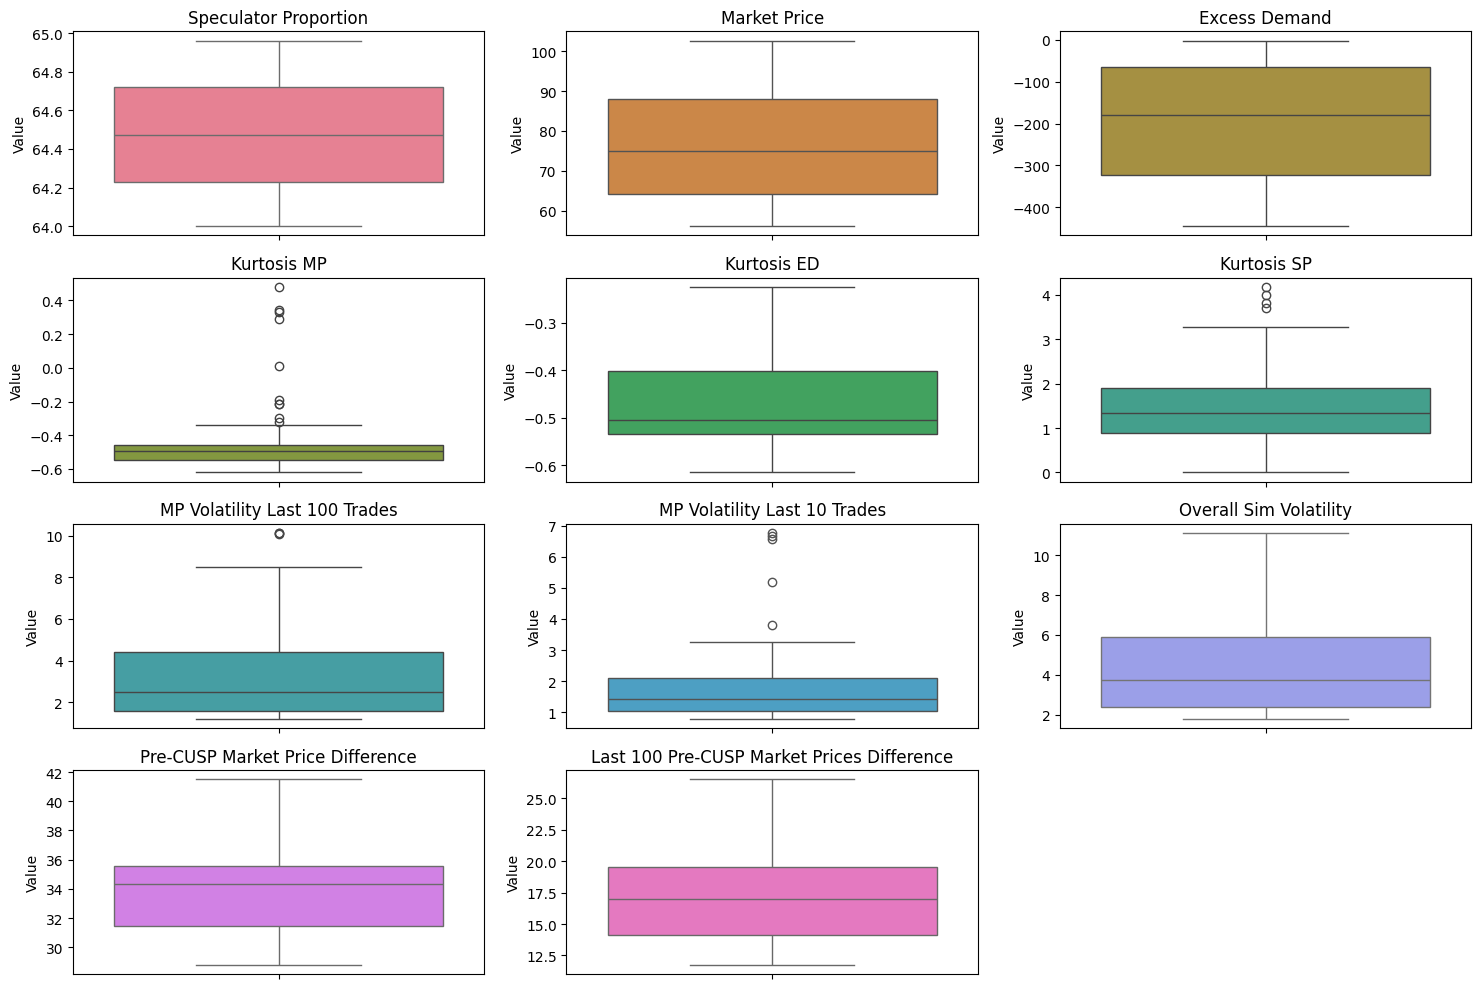

In [53]:
colors = sns.color_palette('husl', len(columns_of_interest)) 

n_cols = 3  
n_rows = (len(columns_of_interest) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10)) 
axes = axes.flatten()  

for i, column in enumerate(columns_of_interest):
    sns.boxplot(data=df, y=column, ax=axes[i], color=colors[i])  
    axes[i].set_title(column) 
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('Value')  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 1.3 Correlation Matrix

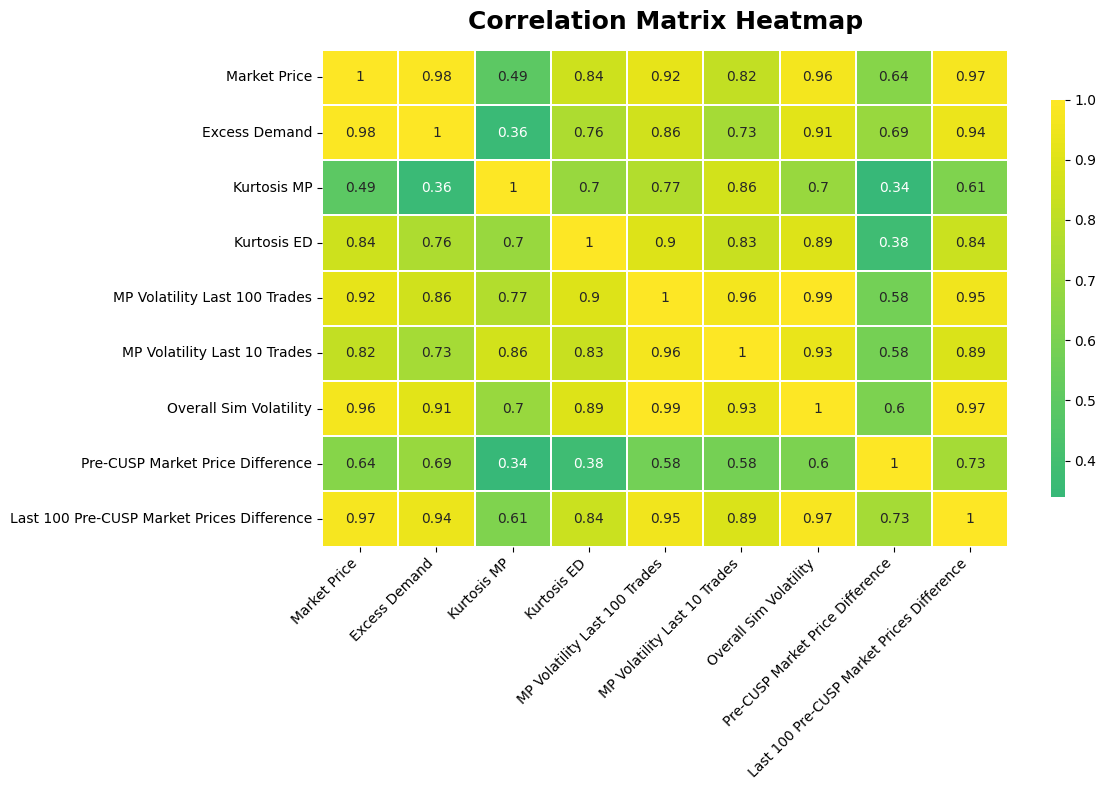

In [57]:
df_2 = df.copy()
corr_cols = [
    'Market Price', 'Excess Demand', 'Kurtosis MP', 
    'Kurtosis ED', 'MP Volatility Last 100 Trades', 
    'MP Volatility Last 10 Trades', 'Overall Sim Volatility', 
    'Pre-CUSP Market Price Difference', 'Last 100 Pre-CUSP Market Prices Difference'
]

# df_2 = df_2[columns_of_interest]
df_2 = df_2[corr_cols]
corr_matrix = df_2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='viridis', 
    center=0, 
    linewidths=0.3, 
    cbar_kws={"shrink": 0.8, "aspect": 30},  
    annot_kws={"size": 10}, 
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

# 2. Speculator Proportion Analysis Time

## 2.1 Market Price

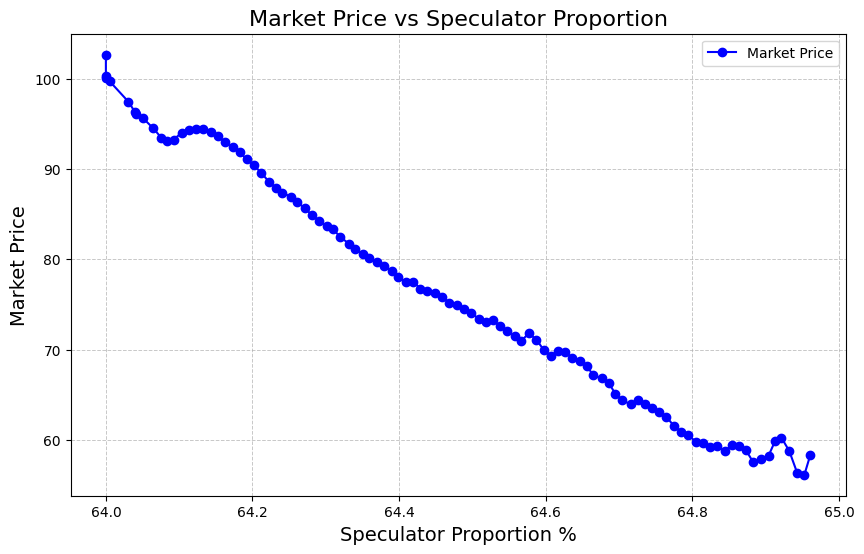

In [64]:
df_3 = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df_3['Speculator Proportion'], df_3['Market Price'], marker='o', color='b', linestyle='-', label='Market Price')

plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Market Price', fontsize=14)
plt.title('Market Price vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


## 2.2 Excess Demand

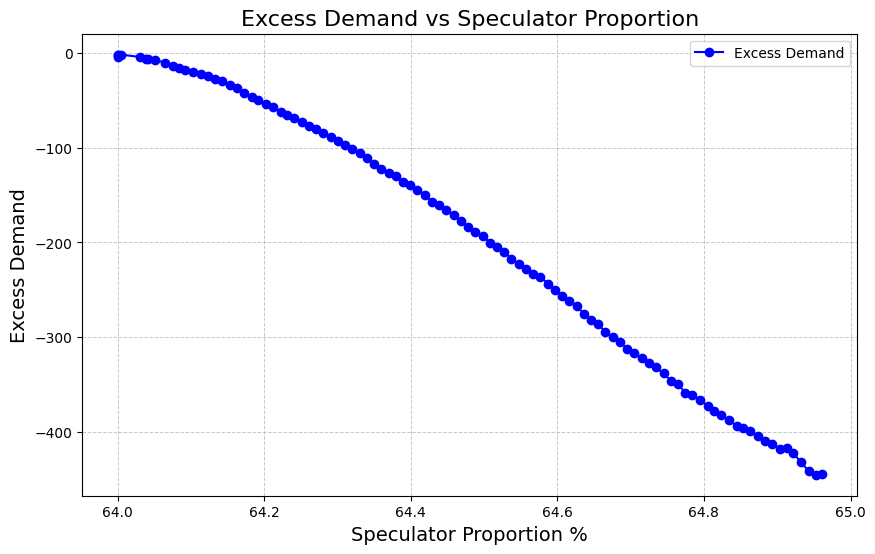

In [66]:
df_4 = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df_4['Speculator Proportion'], df_4['Excess Demand'], marker='o', color='b', linestyle='-', label='Excess Demand')

plt.xlabel('Speculator Proportion %', fontsize=14)
plt.ylabel('Excess Demand', fontsize=14)
plt.title('Excess Demand vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


## 2.3 Kurtosis Market Price and Excess Demand

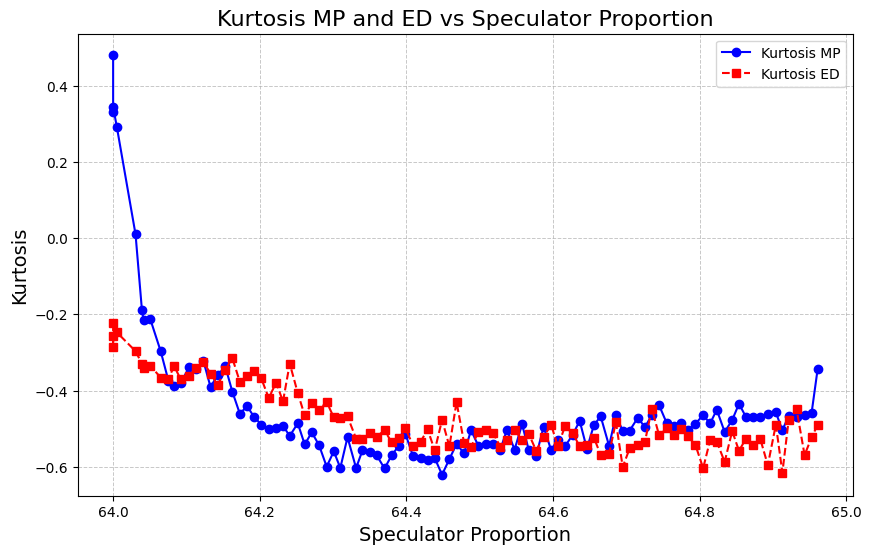

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(
    df['Speculator Proportion'], df['Kurtosis MP'], 
    marker='o', linestyle='-', color='b', label='Kurtosis MP'
)

plt.plot(
    df['Speculator Proportion'], df['Kurtosis ED'], 
    marker='s', linestyle='--', color='r', label='Kurtosis ED'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Kurtosis', fontsize=14)
plt.title('Kurtosis MP and ED vs Speculator Proportion', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()

# Volatility (Overall, Last 100 Trades, Last 10 Trades)

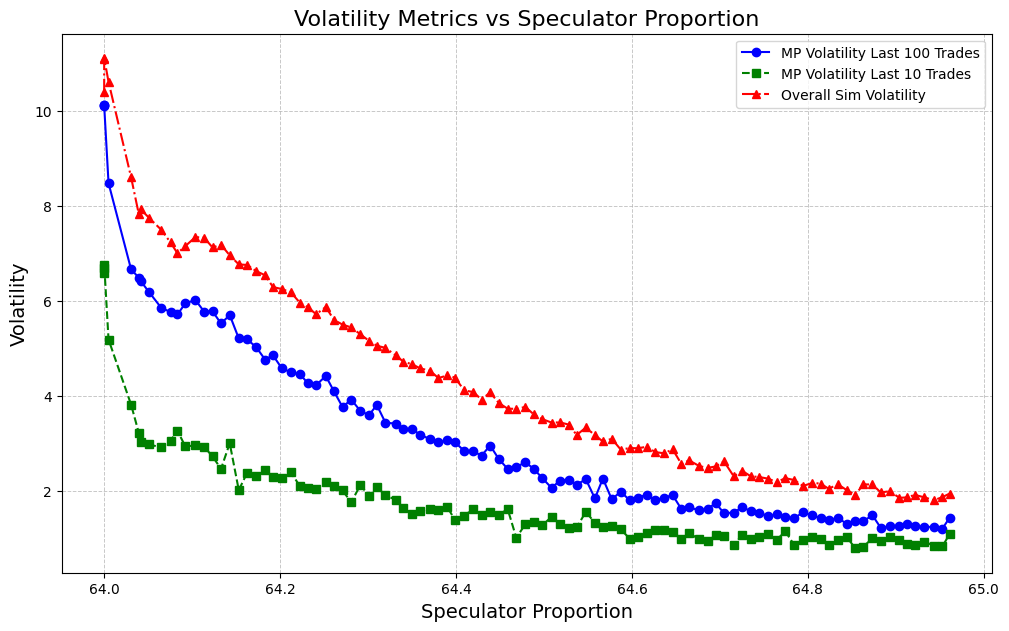

In [77]:
plt.figure(figsize=(12, 7))

plt.plot(
    df['Speculator Proportion'], df['MP Volatility Last 100 Trades'], 
    marker='o', linestyle='-', color='b', label='MP Volatility Last 100 Trades'
)

plt.plot(
    df['Speculator Proportion'], df['MP Volatility Last 10 Trades'], 
    marker='s', linestyle='--', color='g', label='MP Volatility Last 10 Trades'
)

plt.plot(
    df['Speculator Proportion'], df['Overall Sim Volatility'], 
    marker='^', linestyle='-.', color='r', label='Overall Sim Volatility'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.title('Volatility Metrics vs Speculator Proportion', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.show()


## Market Price Difference (Last 100 Trades, Last Trade)

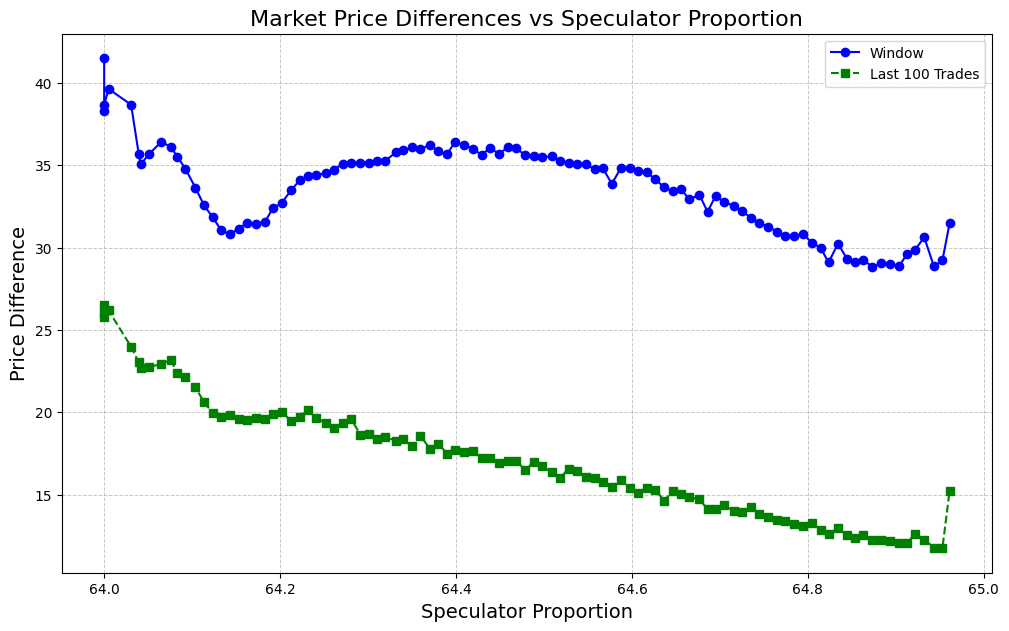

In [83]:
plt.figure(figsize=(12, 7))
plt.plot(
    df['Speculator Proportion'], df['Pre-CUSP Market Price Difference'], 
    marker='o', linestyle='-', color='b', label='Window'
)

plt.plot(
    df['Speculator Proportion'], df['Last 100 Pre-CUSP Market Prices Difference'], 
    marker='s', linestyle='--', color='g', label='Last 100 Trades'
)

plt.xlabel('Speculator Proportion', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.title('Market Price Differences vs Speculator Proportion', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()

plt.show()


In [78]:
df.columns

Index(['Window Num', 'Num Data Points in Row', 'Speculator Proportion',
       'Market Price', 'Excess Demand', 'Kurtosis MP', 'Kurtosis ED',
       'Kurtosis SP', 'MP Volatility Last 100 Trades',
       'MP Volatility Last 10 Trades', 'Overall Sim Volatility',
       'Pre-CUSP Market Price Difference',
       'Last 100 Pre-CUSP Market Prices Difference'],
      dtype='object')